# I. Clustering
# 1. Mean Shift Clustering

### A. Clustering with preproprocessed data after dealing with outliers

In [1]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,normalize
from sklearn.cluster import estimate_bandwidth,MeanShift,KMeans,AgglomerativeClustering,MiniBatchKMeans
import matplotlib.cm as cm
from sklearn import metrics
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as shc
from scipy.cluster.hierarchy import dendrogram
from collections import Counter

In [2]:
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
data_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Sulfate','Turbidity']

scaler=StandardScaler()
data_scaled= scaler.fit_transform(data[data_cols])
print(scaler.mean_)

[7.07042021e+00 1.96560808e+02 2.15589512e+04 7.12207235e+00
 4.25249290e+02 6.64654481e+01 1.42836805e+01 3.33845625e+02
 3.96758734e+00]


In [3]:
for b_w in (np.arange(0.1,1,0.1)):
    bandwidth= estimate_bandwidth(data_scaled,quantile=b_w, n_samples=500,random_state=0)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data_scaled)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    print("\nQuantile: %f"%b_w)
    print("Bandwidth: %f"%bandwidth)
    print("Number of clusters: %d"%n_clusters_)


Quantile: 0.100000
Bandwidth: 3.010944
Number of clusters: 1

Quantile: 0.200000
Bandwidth: 3.379553
Number of clusters: 1

Quantile: 0.300000
Bandwidth: 3.652485
Number of clusters: 1

Quantile: 0.400000
Bandwidth: 3.888542
Number of clusters: 1

Quantile: 0.500000
Bandwidth: 4.112761
Number of clusters: 1

Quantile: 0.600000
Bandwidth: 4.340260
Number of clusters: 1

Quantile: 0.700000
Bandwidth: 4.583425
Number of clusters: 1

Quantile: 0.800000
Bandwidth: 4.869908
Number of clusters: 1

Quantile: 0.900000
Bandwidth: 5.265695
Number of clusters: 1


### B. Clustering with preproprocessed data with outliers

In [4]:
data_with_outliers=pd.read_csv("../Data/data_preprocessed_MICE.csv",index_col=0)
data_with_outliers.head()
scaler=StandardScaler()
data_with_outliers_scaled= scaler.fit_transform(data_with_outliers[data_cols])

In [5]:
for b_w in (np.arange(0.1,1,0.1)):
    bandwidth= estimate_bandwidth(data_with_outliers_scaled,quantile=b_w, n_samples=500,random_state=0)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data_with_outliers_scaled)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    print("\nQuantile: %f"%b_w)
    print("Bandwidth: %f"%bandwidth)
    print("Number of clusters: %d"%n_clusters_)


Quantile: 0.100000
Bandwidth: 2.935282
Number of clusters: 10

Quantile: 0.200000
Bandwidth: 3.291729
Number of clusters: 3

Quantile: 0.300000
Bandwidth: 3.555617
Number of clusters: 2

Quantile: 0.400000
Bandwidth: 3.789651
Number of clusters: 1

Quantile: 0.500000
Bandwidth: 4.014613
Number of clusters: 1

Quantile: 0.600000
Bandwidth: 4.248310
Number of clusters: 1

Quantile: 0.700000
Bandwidth: 4.506218
Number of clusters: 1

Quantile: 0.800000
Bandwidth: 4.818700
Number of clusters: 1

Quantile: 0.900000
Bandwidth: 5.259018
Number of clusters: 1


Number of datapoints in each cluster are: Counter({0: 3272, 1: 4})


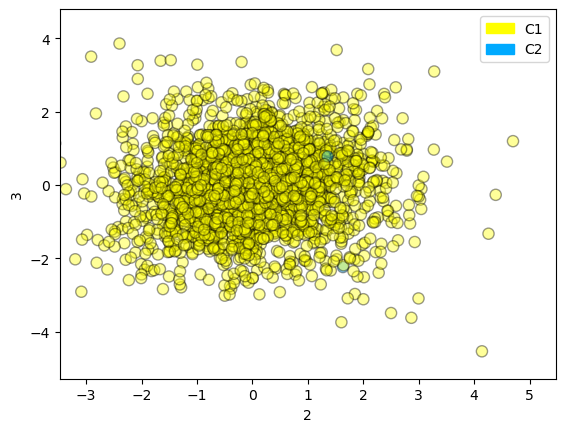

In [6]:
# utility function to scatter plot labelled data using 2 features
def plot_labelled_scatter(X, y, first, second, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X.iloc[:, first].min() - 1, X.iloc[:, first].max() + 1
    y_min, y_max = X.iloc[:, second].min() - 1, X.iloc[:, second].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X.loc[:, 0], X.loc[:, 1], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.xlabel(X.columns[first])
    plt.ylabel(X.columns[second])
    plt.legend(handles=h)
    plt.show()

ms = MeanShift(bandwidth=3.555617, bin_seeding=True)
ms.fit(data_with_outliers_scaled)
print(f'Number of datapoints in each cluster are: {Counter(ms.labels_)}')
# using solids and chloramines as features
plot_labelled_scatter(pd.DataFrame(data_with_outliers_scaled), ms.labels_, 2, 3,['C1', 'C2'])

### C. Silhouette evaluation method

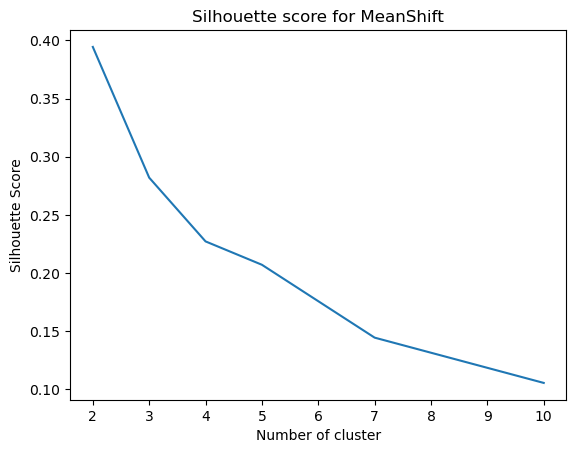

In [7]:
score= {}
for q in np.arange(0.1,0.3,0.01):
    bandwidth= estimate_bandwidth(data_with_outliers_scaled,quantile=q, n_samples=500,random_state=0)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    ms.fit(data_with_outliers_scaled)
    labels = ms.labels_
    cluster_centers = ms.cluster_centers_
    labels_unique = np.unique(labels)
    n_clusters_ = len(labels_unique)
    score[n_clusters_]=metrics.silhouette_score(data_with_outliers_scaled, labels, metric='euclidean')
plt.figure()
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette Score")
plt.title("Silhouette score for MeanShift")
plt.show()

Summary :
1. Two mean shift clustering models were prepared, one with dataset after removing with outliers and another before 
removing with outliers. The model with dataset after removing with outliers was not able to correctly estimate
the number of clusters. While, the model with later dataset, was correctly varying the number of clusters along the 
range of bandwidth (hence, quauntile). With increase in bandwidth (and quantile),number of clusters decreases. So, 
optimal quantile is 0.3 and bandwidth is 3.55. One possible reason for this discrepancies can be, MeanShift is forming the clusters considering the outliers. And therefore, number of datapoints in one cluster (that is cluster 0 has 3272 datapoints) is significantly high than other (cluster 1 has 4 datapoints).
2. Silhoutte score is high with 0.394 for 2 clusters and it decreases to 0.105 as the number of clusters increases to 10. However, it is still low because of overlapping clusters.
3. Eventhough, MeanShift algorithm shows better Silhoutte score but it fails to form appropriate clusters.

# 2. K Means
### A. Inertia evaluation method

In [8]:
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
data_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Sulfate','Turbidity']

Text(0, 0.5, 'Inertia')

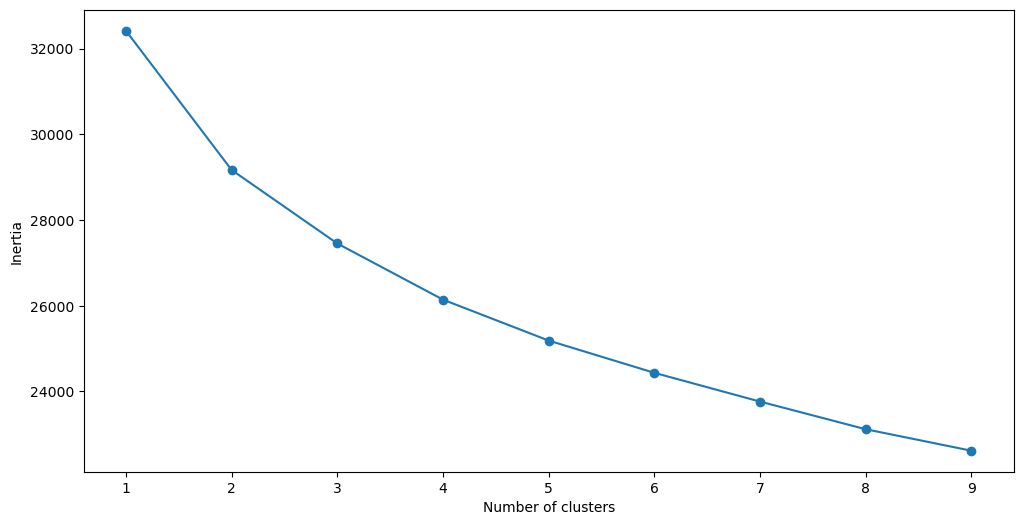

In [9]:
# Normalizing data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), index = data.index, columns = data.columns)

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

In [10]:
# k means using 2 clusters and k-means++ initialization
kmeans = KMeans(n_clusters = 2, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)
frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    1984
1    1258
Name: cluster, dtype: int64

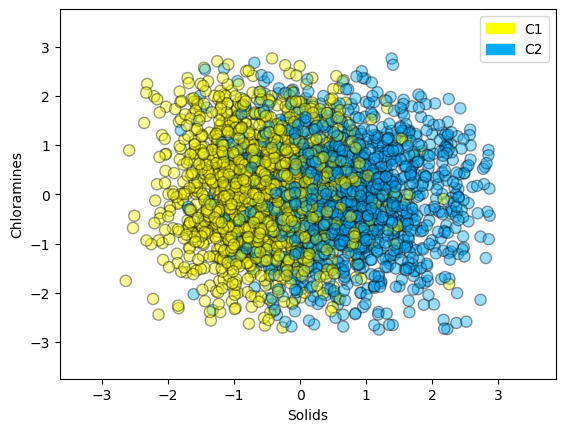

In [11]:
# utility function to scatter plot labelled data using 2 features
def plot_labelled_scatter(X, y, first, second, class_labels):
    num_labels = len(class_labels)

    x_min, x_max = X.iloc[:, first].min() - 1, X.iloc[:, first].max() + 1
    y_min, y_max = X.iloc[:, second].min() - 1, X.iloc[:, second].max() + 1

    marker_array = ['o', '^', '*']
    color_array = ['#FFFF00', '#00AAFF', '#000000', '#FF00AA']
    cmap_bold = ListedColormap(color_array)
    bnorm = BoundaryNorm(np.arange(0, num_labels + 1, 1), ncolors=num_labels)
    plt.figure()

    plt.scatter(X.iloc[:, first], X.iloc[:, second], s=65, c=y, cmap=cmap_bold, norm = bnorm, alpha = 0.40, edgecolor='black', lw = 1)

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    h = []
    for c in range(0, num_labels):
        h.append(mpatches.Patch(color=color_array[c], label=class_labels[c]))
    plt.xlabel(X.columns[first])
    plt.ylabel(X.columns[second])
    plt.legend(handles=h)
    plt.show()

kmeans = KMeans(n_clusters=2)
kmeans.fit(data_scaled[data_cols])

# using solids and chloramines as features
plot_labelled_scatter(data_scaled[data_cols], kmeans.labels_, 2, 3,['C1', 'C2'])

### B. Silhouette evaluation method

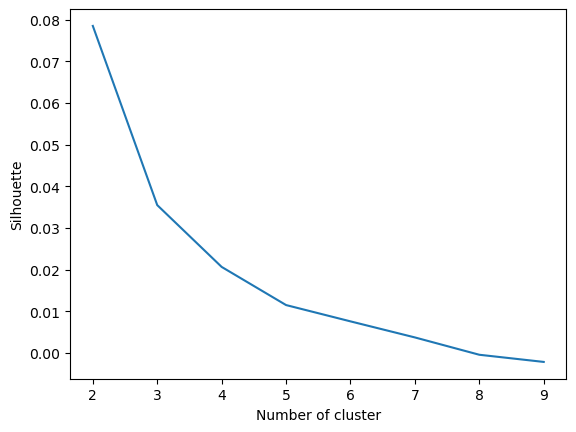

In [12]:
score = {}
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    labels = kmeans.labels_

    score[k] = metrics.silhouette_score(data_scaled[data_cols], labels, metric='euclidean')

plt.figure()
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

For n_clusters = 2 The average silhouette_score is : 0.08484566030671867
For n_clusters = 3 The average silhouette_score is : 0.07901546212740551
For n_clusters = 4 The average silhouette_score is : 0.075487095442102
For n_clusters = 5 The average silhouette_score is : 0.0742397049137722
For n_clusters = 6 The average silhouette_score is : 0.07616048137140044


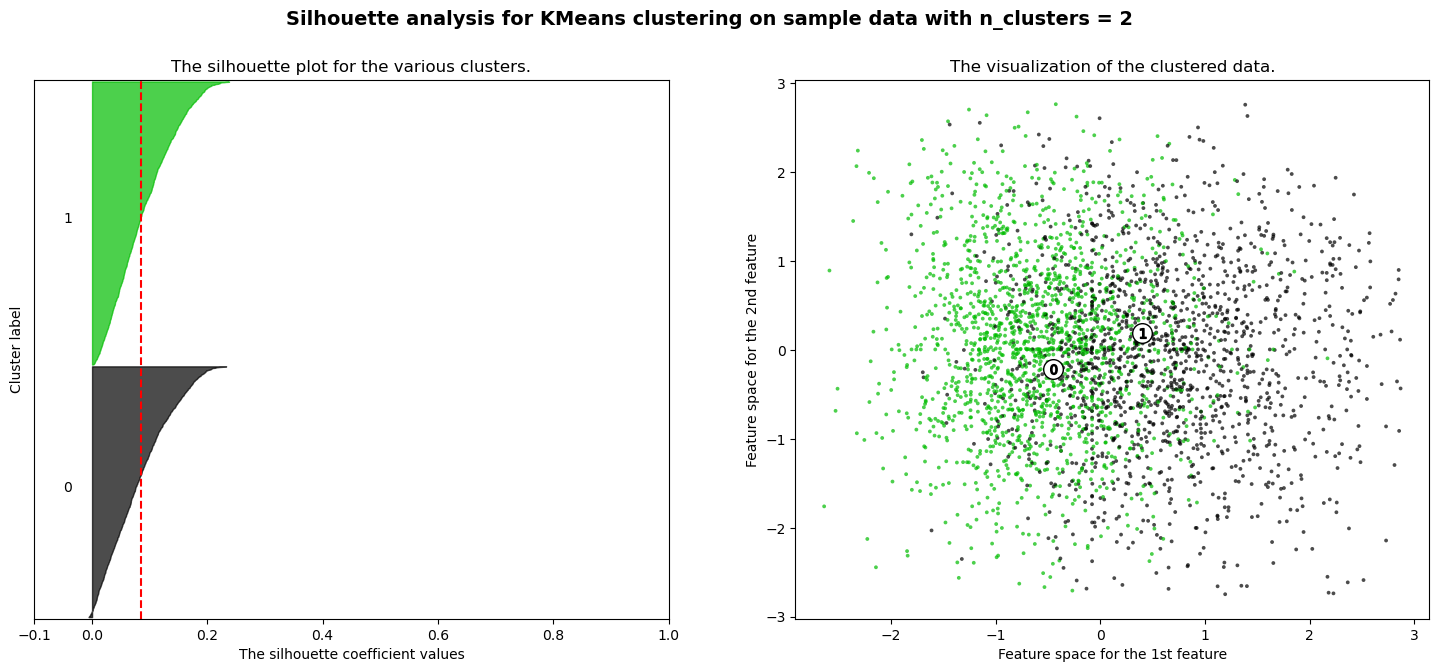

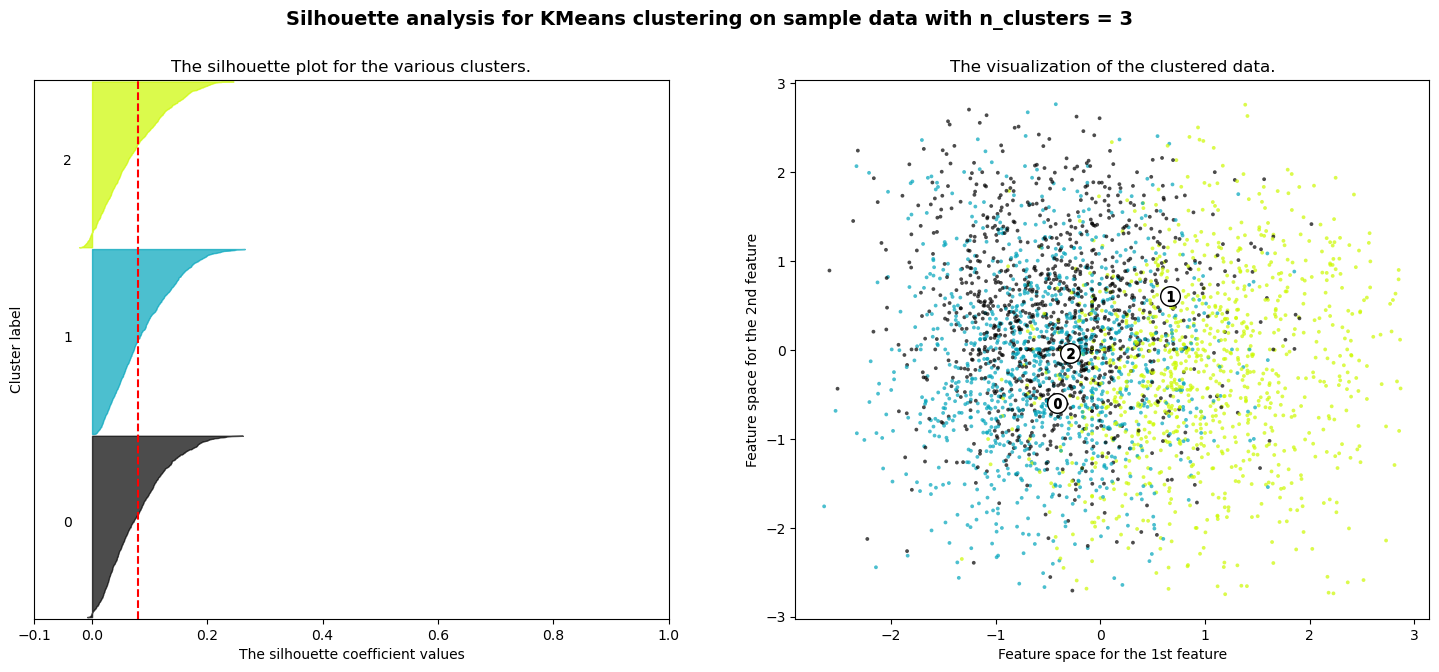

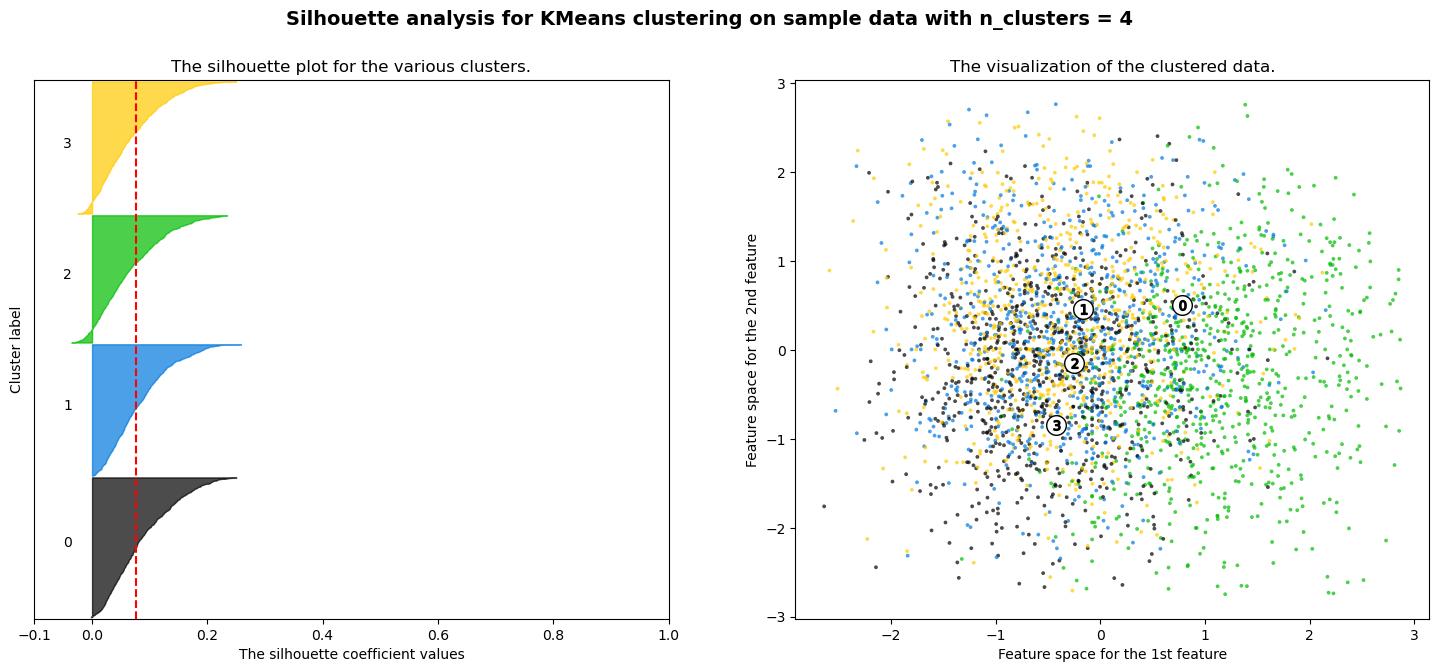

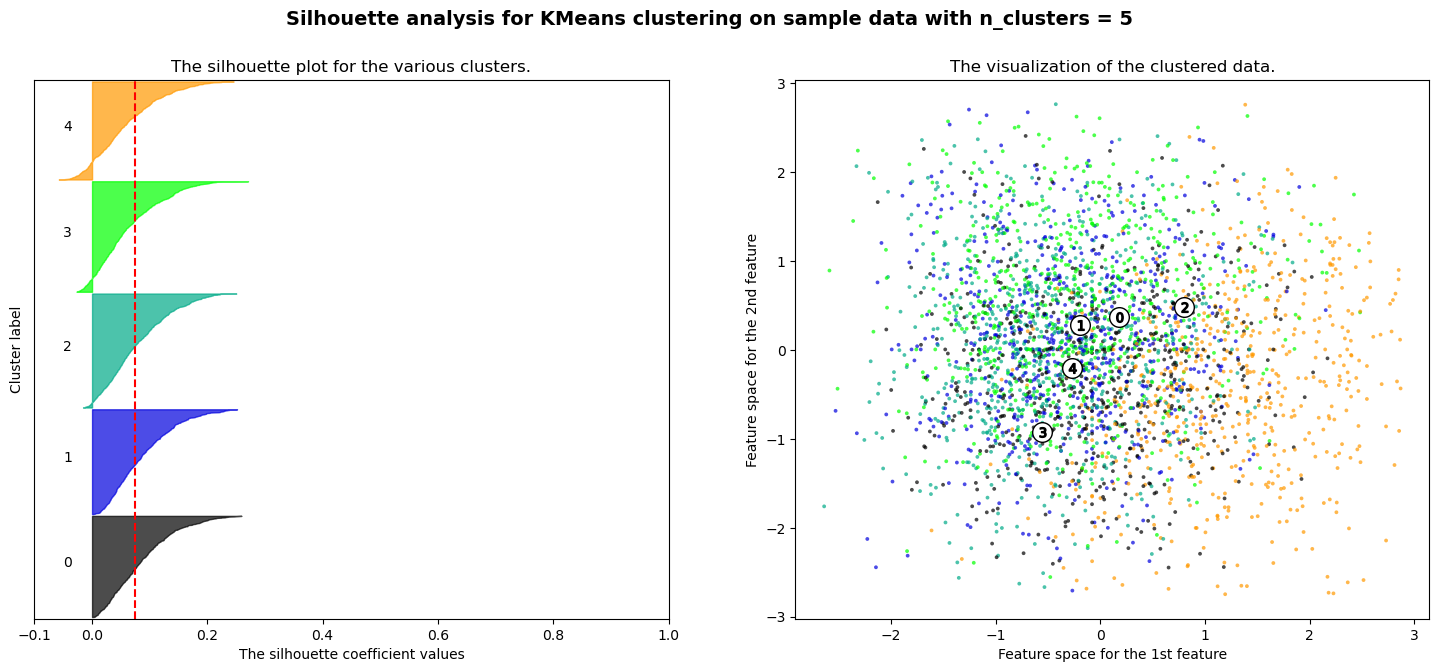

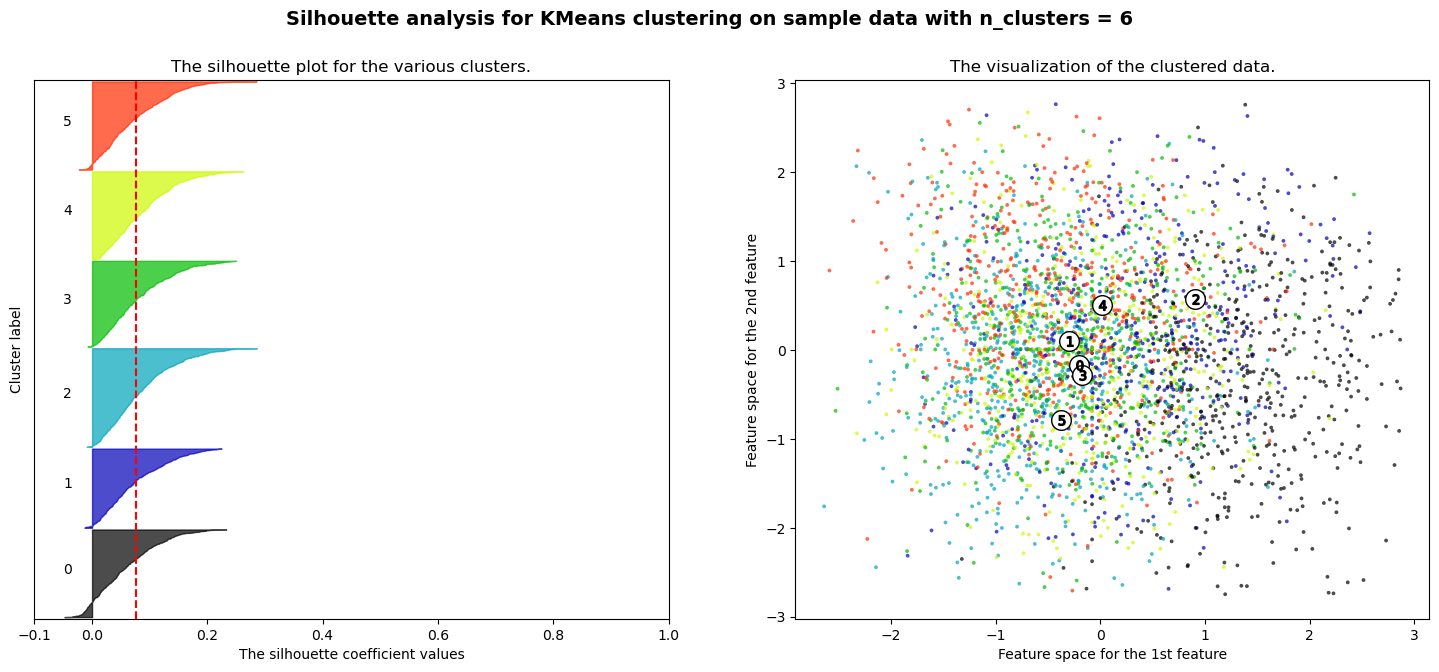

In [13]:
range_n_clusters = [2, 3, 4, 5, 6]
# Using solids and chloramines as features
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(data_scaled[data_cols]) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(data_scaled[data_cols])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(data_scaled[data_cols], cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(data_scaled[data_cols], cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        # adjust the specific features index here
        data_scaled.iloc[:, 2], data_scaled.iloc[:, 3], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Summary

1. Both clustering algorithm indicate that 2 clusters yield the best result.
2. For inertia performance metric, we can use the Elbow method to determine that the sharpest change is at 2 clusters, which identify a cluster of 1984, against another of 1258. These 2 values are closely matched with the known value counts of the classes (1998 and 1278, before dropping outliers, respectively). However, the shape of the curve doesn't really show any distinct sharp, which can benefit the Elbow method, and the SSE is quite high even after 10 iterations. This suggests that it is not a good clustering algorithm for this dataset.
3. For silhouette score metric, it has shown that silhouette score is highest with 2 clusters (0.085). However, this value is just above average, indicating that these 2 clusters are overlapping. Therefore, it reinstates that K means clustering algorithm is not suitable for this dataset.

# 3. Mini-batch K-means

In [14]:
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
data_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Sulfate','Turbidity']

Text(0.5, 1.0, 'Number of cluster vs Inertia')

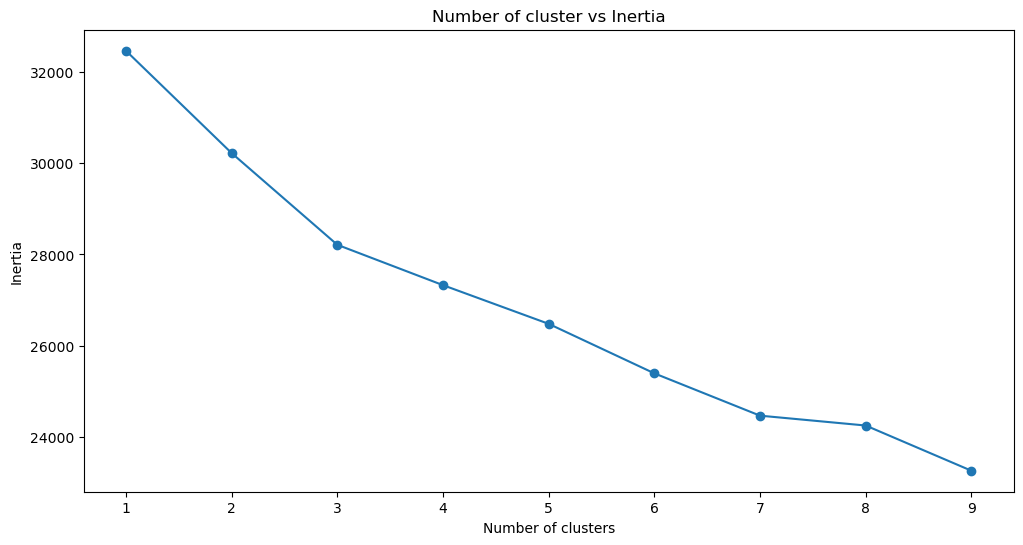

In [15]:
# Normalizing data
scaler = StandardScaler()
data_scaled = pd.DataFrame(scaler.fit_transform(data), index = data.index, columns = data.columns)

# fitting multiple minibatchkmeans algorithms for batch size 45 and storing SSE
SSE = {}
for cluster in range(1,10):
    mbkmeans = MiniBatchKMeans(n_clusters = cluster, random_state=42,batch_size=45)
    mbkmeans.fit(data_scaled)
    SSE[cluster]=(mbkmeans.inertia_)

#  plotting them

plt.figure(figsize=(12,6))
plt.plot(list(SSE.keys()), list(SSE.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Number of cluster vs Inertia')

Text(0.5, 1.0, 'Batch size vs Inertia')

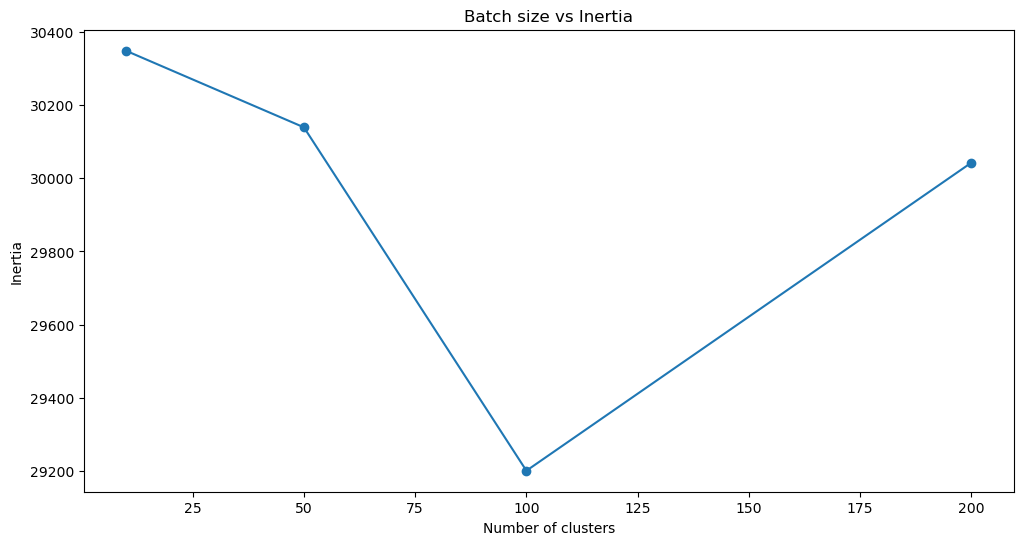

In [16]:
# fitting multiple minibatchkmeans algorithms for 2 cluster and storing SSE
batch = {}
for batch_size in [10, 50, 100,200]:
    kmeans = MiniBatchKMeans(n_clusters = 2, random_state=42,batch_size=batch_size)
    kmeans.fit(data_scaled)
    batch[batch_size]=(kmeans.inertia_)

#  plotting them

plt.figure(figsize=(12,6))
plt.plot(list(batch.keys()), list(batch.values()), marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Batch size vs Inertia')

In [17]:
mbkmeans = MiniBatchKMeans(n_clusters = 2, random_state=42,batch_size=50)
mbkmeans.fit(data_scaled)
print(Counter(mbkmeans.labels_))



Counter({0: 1911, 1: 1331})


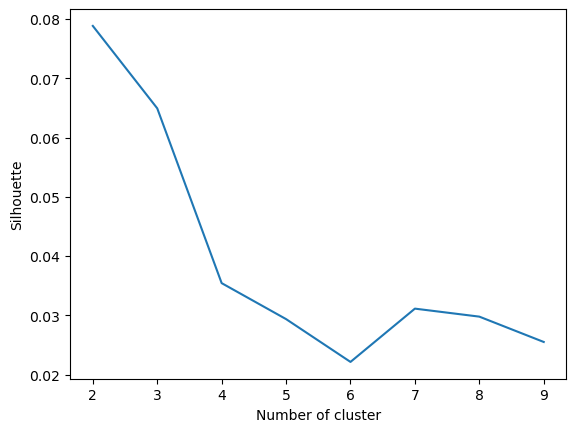

In [18]:
score = {}
for k in range(2, 10):
    mbkmeans = MiniBatchKMeans(n_clusters=k,random_state=42,batch_size=50).fit(data_scaled)
    labels = mbkmeans.labels_

    score[k] = metrics.silhouette_score(data_scaled[data_cols], labels, metric='euclidean')

plt.figure()
plt.plot(list(score.keys()), list(score.values()))
plt.xlabel("Number of cluster")
plt.ylabel("Silhouette")
plt.show()

Summary:
1. Mini-batch Kmeans algorithms performed similar to K-means as the dataset is not huge, according to 
Silhouette score.

# 4. Agglomerative Clustering

In [19]:
# Importing preprocessed data
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
display(data)

# Scaling the data so that all the features become comparable
scaler=StandardScaler()
data_scaled= scaler.fit_transform(data)

# Normalizing the data so that the data approximately follows a Gaussian distribution and Converting the numpy array into a pandas DataFrame
data_normalized = pd.DataFrame(normalize(data_scaled))
data_normalized.columns = data.columns
data_normalized.drop("Potability", axis=1, inplace=True)
display(data_normalized)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,20927.833607,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,340.951154,392.449580,19.903225,66.977633,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,326.676061,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,332.463189,402.883113,11.168946,77.488213,4.708658,1


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,0.033531,0.090409,-0.030074,0.039150,0.315075,0.552873,-0.385965,0.442975,-0.418456
1,-0.002485,-0.671407,-0.105725,-0.098578,0.092511,0.614079,0.081649,-0.201558,0.204614
2,0.329040,0.368729,-0.079323,0.581042,0.009605,-0.032421,0.313711,-0.001202,-0.466205
3,0.305223,0.181702,0.016918,0.193589,0.196783,-0.231602,0.385870,0.687110,0.258874
4,0.504577,-0.160706,-0.134332,-0.121131,-0.206365,-0.102197,-0.258069,-0.712444,0.042888
...,...,...,...,...,...,...,...,...,...
3237,-0.696429,-0.034766,-0.027509,0.010897,0.263908,0.447520,-0.042816,0.005336,0.217019
3238,0.210927,-0.035784,-0.181628,0.226287,0.070783,-0.142949,0.609028,0.012117,-0.534009
3239,0.617654,-0.227785,0.458446,0.050597,-0.065744,0.027262,-0.323687,0.073605,-0.281108
3240,-0.512212,0.373690,-0.379389,-0.181972,-0.012706,-0.089932,-0.311436,0.240588,0.312233


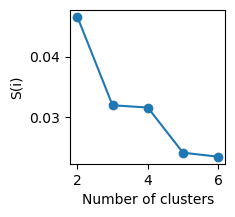

In [20]:
n_clusters = [2,3,4,5,6]

silhouette_scores = []
for n_cluster in n_clusters:
    ac = AgglomerativeClustering(n_clusters=n_cluster)
    # Appending the silhouette scores of the different models to the list
    silhouette_scores.append(silhouette_score(data_normalized, ac.fit_predict(data_normalized)))


# Plotting a bar graph to compare the results
plt.figure(figsize = (2,2))
plt.plot(n_clusters, silhouette_scores, marker="o")
plt.xlabel('Number of clusters')
plt.ylabel('S(i)')
plt.show()

In [21]:
ac = AgglomerativeClustering(n_clusters=2).fit(data_normalized)
print(Counter(ac.labels_))

Counter({0: 2380, 1: 862})


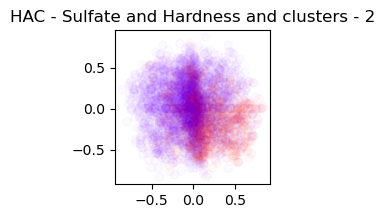

In [22]:
plt.figure(figsize = (2,2))
plt.title('HAC - Sulfate and Hardness and clusters - 2')
plt.scatter(data_normalized["Sulfate"], data_normalized["Hardness"], c = ac.fit_predict(data_normalized), cmap ='rainbow', alpha=0.025)
# Appending the silhouette scores of the different models to the list
plt.show()

Summary:
1. Silhouette score shows 2 clusters are best for dataset, however the score is still very low i.e. 0.046. This is because the data is mostly overlapping.

# 5. Comparison between clustering algorithm

1. All four algorithms has shown high Silhouette score for 2 clusters. However, silhouette scores are
relatively close to 0 because the two clusters are overlapping each other.
2. The number of datapoints in 2 clusters formed by k-means are 1984 and 1258 for cluster 0 and 1 respectively. These values closely matched with the known value counts of the classes (1998 and 1278, before dropping outliers, respectively). It indicates that K-means is the best out of the 4 clustering algorithm.
3. Another performance metric which leads to the same conclusion is that K-means clustering algorithm has the highest Silhouette score out of all (0.085).

# II. Classification models

In [38]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import train_test_split,KFold,StratifiedKFold, GridSearchCV,learning_curve, train_test_split, validation_curve
from sklearn.metrics import classification_report, confusion_matrix,ConfusionMatrixDisplay,roc_curve,accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, roc_auc_score,f1_score
from sklearn.neural_network import MLPClassifier

from matplotlib.colors import ListedColormap



# 1. Support Vector Machine
### A. Modeling

In [24]:
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [25]:
X_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Sulfate','Turbidity']
Y_col=['Potability']

In [26]:
#spliting the dataset
X_train, X_test, y_train, y_test=train_test_split(data[X_cols],data[Y_col],random_state=42, test_size=0.25)

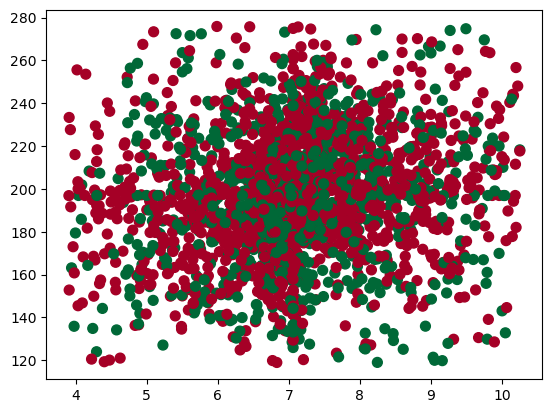

In [27]:
plt.scatter(X_train.iloc[:,0], X_train.iloc[:,1],
           marker= 'o', s=50, cmap=plt.cm.RdYlGn,c=y_train.to_numpy(dtype=int))
plt.show()

In [40]:
#hyperparameter tuning
X_train_np=np.array(X_train)
y_train_np=np.array(y_train)
params={'C':[0.1,1,10,100],'kernel':['rbf','poly','sigmoid'],'degree':[2,3],'gamma':[0.1,0.001]}
scaler=StandardScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
    

make_gridsearch= GridSearchCV(SVC(random_state=42),params,n_jobs=-1,cv=StratifiedKFold(n_splits=5,random_state=5,shuffle=True),verbose=2)

In [41]:
make_gridsearch.fit(X_train_scaled,y_train.values.ravel())

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=5, shuffle=True),
             estimator=SVC(random_state=42), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'degree': [2, 3],
                         'gamma': [0.1, 0.001],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             verbose=2)

In [42]:

print(f"The best parameter: {make_gridsearch.best_params_}")
print(f"The best estimator: {make_gridsearch.best_estimator_}")
print(f"The best index: {make_gridsearch.best_index_}")
print(f"The best score: {make_gridsearch.best_score_}")



The best parameter: {'C': 1, 'degree': 2, 'gamma': 0.1, 'kernel': 'rbf'}
The best estimator: SVC(C=1, degree=2, gamma=0.1, random_state=42)
The best index: 12
The best score: 0.6618737377578354


In [48]:
#building a model with best estimator.
svc=SVC(C=1, degree=2, gamma=0.1, random_state=42,probability=True)
svc.fit(X_train_scaled,y_train.values.ravel())

SVC(C=1, degree=2, gamma=0.1, probability=True, random_state=42)

### B. Evaluating the model

In [83]:
#testing 
pred=svc.predict(X_test_scaled)
print("Classification Report: \n")
print(classification_report(y_test,pred))
f1_svc=f1_score(y_test,pred,average="macro")
#print(roc_auc_score(y_test, pred))

Classification Report: 

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       517
           1       0.00      0.00      0.00       294

    accuracy                           0.64       811
   macro avg       0.32      0.50      0.39       811
weighted avg       0.41      0.64      0.50       811



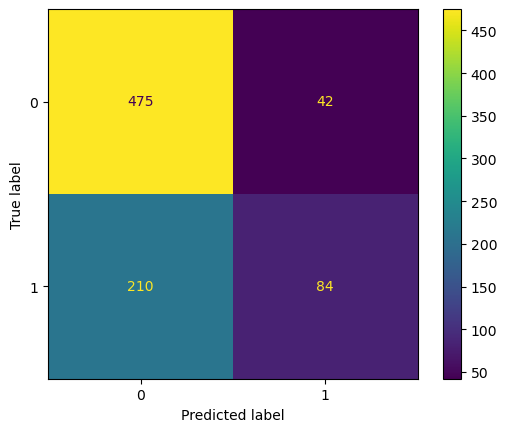

In [50]:
cm=confusion_matrix(y_test,pred)
display_cm=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= svc.classes_)
display_cm.plot()
plt.show()

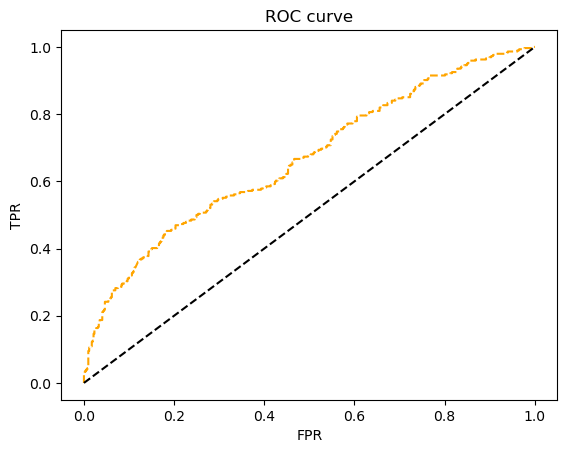

In [51]:
#plotting ROC curve
pred_proba=svc.predict_proba(X_test_scaled)
fpr_svm,tpr_svm,threshold=roc_curve(y_test,pred_proba[:,1], pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.plot(fpr_svm,tpr_svm,linestyle='--',color="orange",label='SVC')
plt.plot(p_fpr,p_tpr,linestyle='--',color='black')
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# 2. Decision Tree Classification

### A. Modelling

In [52]:
# Importing preprocessed data
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)

data_x= data.drop(labels=["Potability"],axis=1).copy(deep=True)
data_y = pd.DataFrame(data, columns=['Potability'])

display(data_x)
display(data_y)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075
...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,20927.833607,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821
3272,7.808856,193.553212,17329.802160,8.061362,340.951154,392.449580,19.903225,66.977633,2.798243
3273,9.419510,175.762646,33155.578218,7.350233,326.676061,432.044783,11.039070,69.845400,3.298875
3274,5.126763,230.603758,11983.869376,6.303357,332.463189,402.883113,11.168946,77.488213,4.708658


,Potability
0,0
1,0
2,0
3,0
4,0
...,...
3271,1
3272,1
3273,1
3274,1


In [53]:
#Training and Test Data splitting
x_train,x_test,y_train,y_test = train_test_split(data_x,data_y,test_size=0.25,random_state=42)

scaler=StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

print(f'X train shape: {x_train.shape}')
print(f'Y train shape: {y_train.shape}')
print(f'X test shape: {x_test.shape}')
print(f'Y test shape: {y_test.shape}')

X train shape: (2431, 9)
Y train shape: (2431, 1)
X test shape: (811, 9)
Y test shape: (811, 1)


In [54]:
param_grid = {"max_depth":[*range(2, 50, 3)],
              "criterion":["gini", "entropy", "log_loss"],
              "max_features" : ["sqrt", "log2"],
              "random_state" : [*range(2, 50, 5)]
              }
kff_clf = StratifiedKFold(n_splits=10, shuffle=True)
clf_grid_cv = DecisionTreeClassifier(random_state=42)
grid_search_cv= GridSearchCV(clf_grid_cv,param_grid,cv=kff_clf)
grid_search_cv.fit(x_train,y_train)

print(f"The best parameter: {grid_search_cv.best_params_}")
print(f"The best estimator: {grid_search_cv.best_estimator_}")
print(f"The best index: {grid_search_cv.best_index_}")
print(f"The best score: {grid_search_cv.best_score_}")

[CV] END .............C=0.1, degree=2, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END .........C=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ..........C=0.1, degree=2, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END .......C=0.1, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .........C=0.1, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ..........C=0.1, degree=3, gamma=0.001, kernel=poly; total time=   0.2s
[CV] END .......C=0.1, degree=3, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END ..............C=1, degree=2, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ..............C=1, degree=2, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .............C=1, degree=2, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .........C=1, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END ..............C=1, 

[CV] END ............C=0.1, degree=2, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .........C=0.1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ...........C=0.1, degree=2, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .......C=0.1, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END ............C=0.1, degree=3, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END .........C=0.1, degree=3, gamma=0.1, kernel=sigmoid; total time=   0.3s
[CV] END ...........C=0.1, degree=3, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END ...............C=1, degree=2, gamma=0.1, kernel=rbf; total time=   0.3s
[CV] END ...........C=1, degree=2, gamma=0.1, kernel=sigmoid; total time=   0.2s
[CV] END .............C=1, degree=2, gamma=0.001, kernel=rbf; total time=   0.3s
[CV] END .........C=1, degree=2, gamma=0.001, kernel=sigmoid; total time=   0.2s
[CV] END ..............C=1, degree=3, gamma=0.1, kernel=poly; total time=   0.2s
[CV] END ...........C=1, deg

The best parameter: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'sqrt', 'random_state': 12}
The best estimator: DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       random_state=12)
The best index: 342
The best score: 0.6232122377386494


Feature importances: [0.28157289 0.09086053 0.03826587 0.         0.42101287 0.06944115
 0.06839435 0.03045233 0.        ]


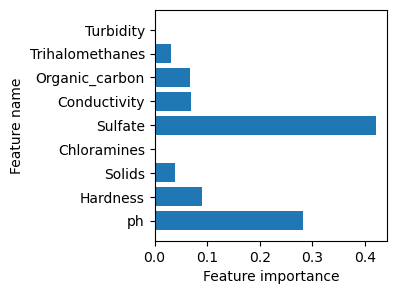

In [55]:
# a function to plot a bar graph of important features
def plot_feature_importances(clf, feature_names):
    c_features = len(feature_names)
    plt.barh(range(c_features), clf.feature_importances_)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature name")
    plt.yticks(np.arange(c_features), feature_names)
    plt.show()

clf_dtc_model =  DecisionTreeClassifier(criterion='entropy', max_depth=5, max_features='sqrt',
                       random_state=12
                                        )
clf_dtc_model.fit(x_train,y_train)
print(f'Feature importances: {clf_dtc_model.feature_importances_}')

plt.figure(figsize=(3,3), dpi=100)
plot_feature_importances(clf_dtc_model, data_x.columns)
# chart_png(plt,"Feature_Importance_chart_Decision tree classifier")

### B. Model Evaluation

Classification Report :-


,precision,recall,f1-score,support
0,0.660793,0.870406,0.751252,517.000000
1,0.484615,0.214286,0.297170,294.000000
accuracy,0.632552,0.632552,0.632552,0.632552
macro avg,0.572704,0.542346,0.524211,811.000000
weighted avg,0.596926,0.632552,0.586640,811.000000


Accuracy Score: 0.6325524044389642


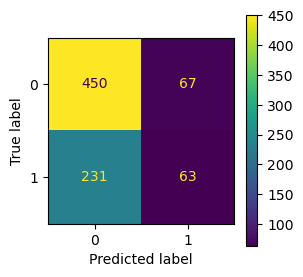

In [56]:
y_predict =clf_dtc_model.predict(x_test)
print("Classification Report :-")
display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).transpose())
cm=confusion_matrix(y_test, y_predict, labels=clf_dtc_model.classes_)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Score:",accuracy_score(y_test, y_predict))
confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix= cm,
                                                display_labels=clf_dtc_model.classes_)
fig, ax = plt.subplots(figsize=(3,3))
confusionMatrixDisplay.plot(ax=ax)
plt.show()
f1_dt=f1_score(y_test,y_predict,average="macro")

roc_auc_score for DecisionTree:  0.5413919919998947


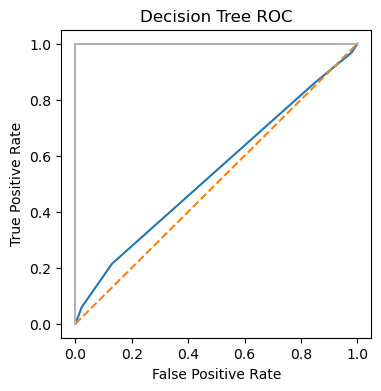

In [57]:
y_score1 = clf_dtc_model.predict_proba(x_test)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for DecisionTree: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(4,4))
plt.title('Decision Tree ROC')
plt.plot(false_positive_rate1, true_positive_rate1)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3. KNN Classification

### A. Modelling

In [62]:
knn = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

# defining parameter range
grid_search_cv = GridSearchCV(knn, param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True), scoring='accuracy', return_train_score=False,verbose=1)

# fitting the model for grid search
grid_search_cv.fit(x_train, y_train.values.ravel())

print(f"The best parameter: {grid_search_cv.best_params_}")
print(f"The best estimator: {grid_search_cv.best_estimator_}")
print(f"The best index: {grid_search_cv.best_index_}")
print(f"The best score: {grid_search_cv.best_score_}")

Fitting 10 folds for each of 30 candidates, totalling 300 fits
The best parameter: {'n_neighbors': 27}
The best estimator: KNeighborsClassifier(n_neighbors=27)
The best index: 26
The best score: 0.6380085003035822


Classification Report :-


,precision,recall,f1-score,support
0,0.675214,0.916828,0.777687,517.000000
1,0.605505,0.224490,0.327543,294.000000
accuracy,0.665845,0.665845,0.665845,0.665845
macro avg,0.640359,0.570659,0.552615,811.000000
weighted avg,0.649943,0.665845,0.614503,811.000000


Accuracy Score: 0.6658446362515413


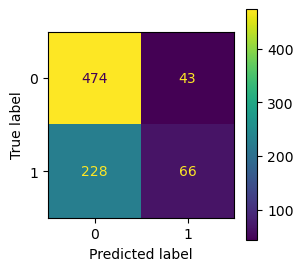

In [63]:
clf_knn_model = KNeighborsClassifier(n_neighbors=27)
clf_knn_model.fit(x_train, y_train.values.ravel())

y_predict =clf_knn_model.predict(x_test)
print("Classification Report :-")
display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).transpose())
cm=confusion_matrix(y_test, y_predict, labels=clf_knn_model.classes_)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Score:",accuracy_score(y_test, y_predict))
confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix= cm,
                                                display_labels=clf_knn_model.classes_)
fig, ax = plt.subplots(figsize=(3,3))
confusionMatrixDisplay.plot(ax=ax)
plt.show()
f1_knn=f1_score(y_test,y_predict,average="macro")

### B. Model Evaluation

roc_auc_score for KNN:  0.6008565902182924


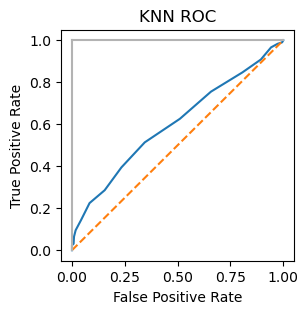

In [64]:
y_score1 = clf_knn_model.predict_proba(x_test)[:,1]
false_positive_rate2, true_positive_rate2, threshold1 = roc_curve(y_test, y_score1)

print('roc_auc_score for KNN: ', roc_auc_score(y_test, y_score1))

plt.subplots(1, figsize=(3,3))
plt.title('KNN ROC')
plt.plot(false_positive_rate2, true_positive_rate2)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 4. Random Forest Classifier

### A. Modelling

In [65]:
param_grid = {"n_estimators": [*range(1, 10, 2)],
              "max_depth":[*range(1, 20, 4)],
              "criterion":["gini", "entropy", "log_loss"],
              "max_features" : ["sqrt", "log2"],
              "random_state" : [*range(1, 50, 10)]
              }
# kff_clf = KFold(n_splits=10, shuffle=True)
rfc = RandomForestClassifier(random_state=42)

# defining parameter range
grid_search_cv = GridSearchCV(rfc, param_grid, cv=StratifiedKFold(n_splits=10, shuffle=True), scoring='accuracy', return_train_score=False)

# fitting the model for grid search
grid_search_cv.fit(x_train, y_train.values.ravel())

print(f"The best parameter: {grid_search_cv.best_params_}")
print(f"The best estimator: {grid_search_cv.best_estimator_}")
print(f"The best index: {grid_search_cv.best_index_}")
print(f"The best score: {grid_search_cv.best_score_}")

The best parameter: {'criterion': 'gini', 'max_depth': 9, 'max_features': 'sqrt', 'n_estimators': 9, 'random_state': 21}
The best estimator: RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=9,
                       random_state=21)
The best index: 122
The best score: 0.6367739324023476


In [67]:
clf_rfc_model = RandomForestClassifier(criterion = 'gini', max_depth=9, max_features='sqrt', n_estimators=9,
                       random_state=21)
clf_rfc_model.fit(x_train, y_train.values.ravel())

RandomForestClassifier(max_depth=9, max_features='sqrt', n_estimators=9,
                       random_state=21)

### B. Model Evaluation

Classification Report :-


,precision,recall,f1-score,support
0,0.685629,0.885880,0.772996,517.000000
1,0.587413,0.285714,0.384439,294.000000
accuracy,0.668311,0.668311,0.668311,0.668311
macro avg,0.636521,0.585797,0.578718,811.000000
weighted avg,0.650024,0.668311,0.632138,811.000000


Accuracy Score: 0.6683107274969173


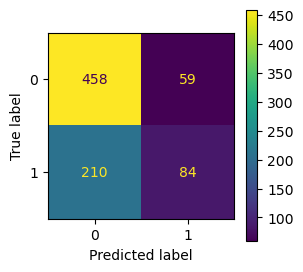

In [68]:
y_predict =clf_rfc_model.predict(x_test)
print("Classification Report :-")
display(pd.DataFrame(classification_report(y_test, y_predict, output_dict=True)).transpose())
cm=confusion_matrix(y_test, y_predict, labels=clf_rfc_model.classes_)
# Model Accuracy, how often is the classifier correct?
print("Accuracy Score:",accuracy_score(y_test, y_predict))
confusionMatrixDisplay = ConfusionMatrixDisplay(confusion_matrix= cm,
                                                display_labels=clf_rfc_model.classes_)
fig, ax = plt.subplots(figsize=(3,3))
confusionMatrixDisplay.plot(ax=ax)
plt.show()
f1_rf=f1_score(y_test,y_predict,average="macro")

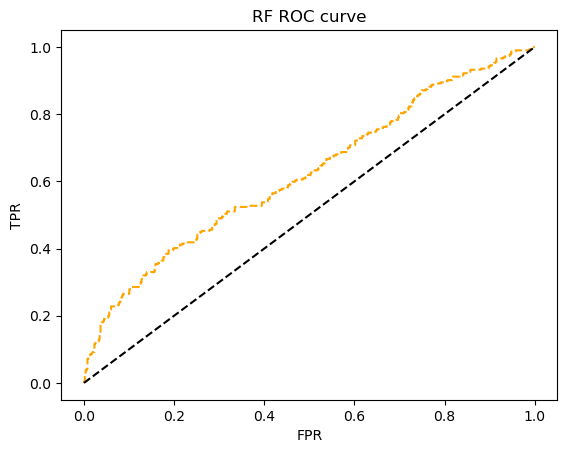

In [69]:
#plotting ROC curve
pred_proba=clf_rfc_model.predict_proba(x_test)
fpr_rf,tpr_rf,threshold=roc_curve(y_test,pred_proba[:,1], pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.plot(fpr_rf,tpr_rf,linestyle='--',color="orange",label='RF')
plt.plot(p_fpr,p_tpr,linestyle='--',color='black')
plt.title("RF ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# 5. Neural Network Classification using MLPClassifier

In [70]:
data= pd.read_csv('../Data/data_preprocessed.csv', index_col=0)
data.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.199101,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,7.060069,129.422921,18630.057858,6.635246,344.894384,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,334.706620,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


### A. Modelling

In [86]:
X_cols=['ph', 'Hardness','Solids','Chloramines','Conductivity','Trihalomethanes','Organic_carbon','Sulfate','Turbidity']
Y_col=['Potability']

#spliting the dataset
X_train, X_test, y_train, y_test=train_test_split(data[X_cols],data[Y_col],random_state=42, test_size=0.25)

params=[
    {'hidden_layer_sizes': [[10, 10], [20, 10], [50, 10], [10, 20], [20, 20], [50, 20], [10, 50], [20, 50], [50, 50]],
     'alpha': [0.01, 0.1, 1, 10],
     'activation': ['tanh', 'relu', 'logistic']}]
scaler=MinMaxScaler()

X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

make_gridsearch= GridSearchCV(MLPClassifier(max_iter=1000),params,n_jobs=-1,cv=StratifiedKFold(n_splits=10, shuffle=True),verbose=2)

make_gridsearch.fit(X_train_scaled,y_train.values.ravel())
print(f"The best parameter: {make_gridsearch.best_params_}")
print(f"The best estimator: {make_gridsearch.best_estimator_}")
print(f"The best index: {make_gridsearch.best_index_}")
print(f"The best score: {make_gridsearch.best_score_}")

Fitting 10 folds for each of 108 candidates, totalling 1080 fits
The best parameter: {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': [20, 10]}
The best estimator: MLPClassifier(alpha=0.1, hidden_layer_sizes=[20, 10], max_iter=1000)
The best index: 46
The best score: 0.6696805639883964


### B. Model evaluation

In [74]:
# build model
nnclf = MLPClassifier(activation= 'relu', alpha= 0.1, hidden_layer_sizes= [50, 50],
              max_iter=1000)
nnclf.fit(X_train_scaled,y_train.values.ravel())

MLPClassifier(alpha=0.1, hidden_layer_sizes=[50, 50], max_iter=1000)

In [84]:
#testing
pred=nnclf.predict(X_test_scaled)
print("Classification Report: \n")
print(classification_report(y_test,pred))
f1_nn=f1_score(y_test,pred,average="macro")
#print(roc_auc_score(y_test, pred))

Classification Report: 

              precision    recall  f1-score   support

           0       0.71      0.83      0.76       517
           1       0.57      0.40      0.47       294

    accuracy                           0.67       811
   macro avg       0.64      0.61      0.62       811
weighted avg       0.66      0.67      0.66       811

0.6138732088580113


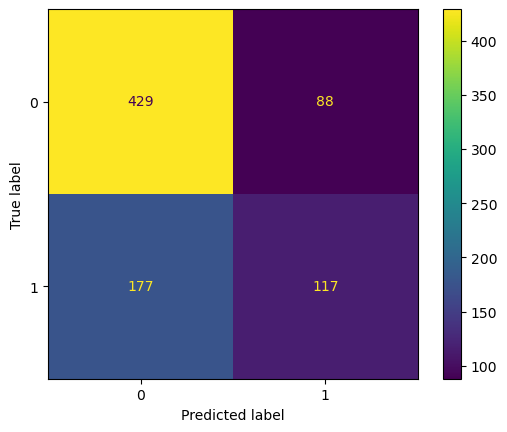

In [76]:
cm=confusion_matrix(y_test,pred)
display_cm=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= nnclf.classes_)
display_cm.plot()
plt.show()

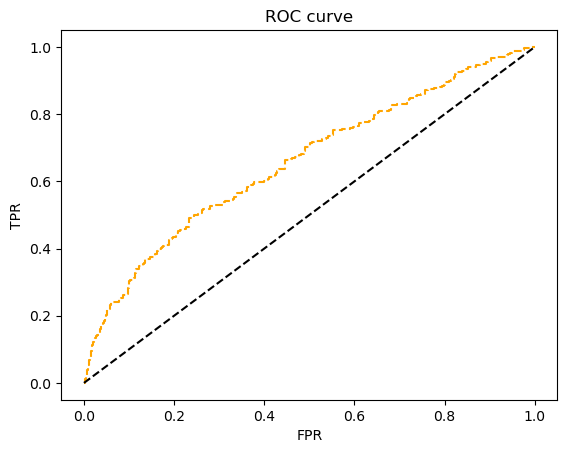

In [77]:
#plotting ROC curve
pred_proba=nnclf.predict_proba(X_test_scaled)
fpr_mlp,tpr_mlp,threshold=roc_curve(y_test,pred_proba[:,1], pos_label=1)
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',color="orange",label='SVC')
plt.plot(p_fpr,p_tpr,linestyle='--',color='black')
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

# 6. Comparision between classification algorithms

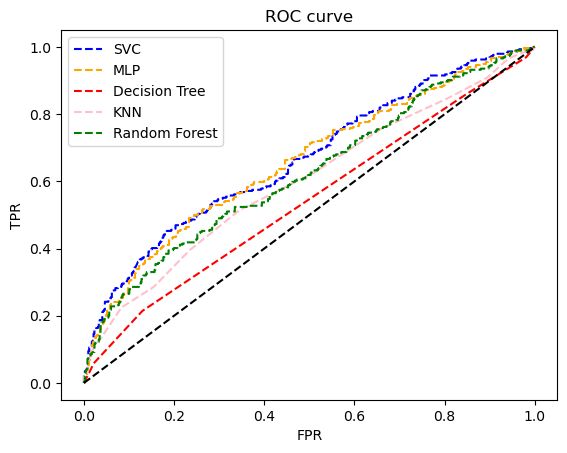

In [80]:
random_probs=[0 for i in range(len(y_test))]
p_fpr,p_tpr,_=roc_curve(y_test,random_probs,pos_label=1)
plt.plot(fpr_svm,tpr_svm,linestyle='--',color="blue",label='SVC')
plt.plot(fpr_mlp,tpr_mlp,linestyle='--',color="orange",label='MLP')
plt.plot(false_positive_rate1, true_positive_rate1,linestyle='--',color="red",label='Decision Tree')
plt.plot(false_positive_rate2, true_positive_rate2,linestyle='--',color="pink",label='KNN')
plt.plot(fpr_rf,tpr_rf,linestyle='--',color="green",label='Random Forest')
plt.plot(p_fpr,p_tpr,linestyle='--',color='black')
plt.title("ROC curve")
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.legend()
plt.show()

In [81]:
print("F1 scores")
print("SVC: \t\t",round(f1_svc,2))
print("KNN: \t\t",round(f1_knn,2))
print("Decision Tree: \t",round(f1_dt,2))
print("Random Forest: \t",round(f1_rf,2))
print("MLP classifier:\t",round(f1_nn,2))

F1 scores
SVC: 		 0.6
KNN: 		 0.55
Decision Tree: 	 0.52
Random Forest: 	 0.58
MLP classifier:	 0.62


Accuracy
- SVC:  66.19%
- DT:   62.32%
- KNN:  63.81%
- RF:   63.62%
- MLP:  66.8%

# Summary:
1. Accuracy for SVC is 66.19%, for decision tree is 62.32%, KNN has 63.5%, Random forest classifier has 63.6% and 
MLP classifier has 66.8%. So, in terms of accuracy MLP Classifier has the highest accuracy among other classifiers.
2. ROC curve indicates how well a classifier distinguishes between different classes. Considering it, classifier built with Support Vector Machine and MLP performed better than the other classifiers. Area under ROC for former is 0.55 while for later is 0.61.
3. Besides accuracy, other performance metrics such as recall and precision also show a huge difference between the two classes. This might be due to the class imbalance (class 0 has nearly 2000 data points, and class 1 only has approximately 1200 data points). Another reason might be due to model bias, in which the model is more trained with data point from class 0, resulting in mis-classification of data from class 1.
4. For identifying whether water is potable or not, it is important to correctly classify the inputs because both mis-classification can lead to tremendous loss. The f1-score ranges between 0.52 and 0.62, indicating that precision and recall scores are not at their optimal level. This might also be due to the problem with imbalance class distribution.Considering F1 score, MLP classifier has performed better.
5. Following the evaluation of the models, one potential future improvement is to either under-sample the dataset so that the data tuples belong to each class are balanced, or oversample the minority class. However, when using oversampling technique (from sklearn or SMOTE), we need to ensure that it is performed after splitting the dataset into training and testing set to avoid overfitting model.